In [1]:
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
#import theano
from PIL import Image
from numpy import *
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
import tensorflow as tf

In [2]:
# input image dimensions
#img_rows, img_cols = 1800, 2700
img_rows, img_cols = 800, 800
img_channels = 1

path = os.getcwd()
print ("Saat ini Anda sedang berada di "+path)
path1 = path+"\\datasetDaun"    #path of folder of images    
path2 = path+"\\dataset_resizeDaun"  #path of folder to save images    
print(path1)
print(path2)


Saat ini Anda sedang berada di /content
/content\datasetDaun
/content\dataset_resizeDaun


In [3]:
listing = os.listdir(path1)
num_samples=size(listing)
print (num_samples)
#%%
for file in listing:
    im = Image.open(path1 + '\\' + file)  
    img = im.resize((img_rows,img_cols))
    gray = img.convert('L')
    gray.save(path2 +'\\' +  file, "JPEG")
    print(file)

imlist = os.listdir(path2)

im1 = array(Image.open(path2 + '\\'+ imlist[0])) # open one image to get size
m,n = im1.shape[0:2] # get the size of the images
imnbr = len(imlist) # get the number of images

# create matrix to store all flattened images
immatrix = array([array(Image.open(path2+ '\\' + im2)).flatten()
              for im2 in imlist],'f')
#%%      
label=np.ones((num_samples,),dtype = int)
label[0:15]=0 #kat1
label[15:30]=1 #kat2
label[30:45]=2 #kat3


FileNotFoundError: ignored

In [ ]:
data,Label = shuffle(immatrix,label, random_state=2)
train_data = [data,Label]
print(label)

print(train_data[0])
print(train_data[1])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[2 1 2 0 2 1 0 0 0 0 0 1 2 1 2 2 2 0 1 1 1 1 2 0 0 0 0 2 0 2 1 1 1 2 1 2 2
 2 0 0 1 1 0 1 2]


In [ ]:
#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 3
# number of epochs to train
nb_epoch = 10 #50

# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

print(nb_classes)



3


(45, 640000)
(45,)
X_train shape: (31, 800, 800, 1)
X_test shape: (14, 800, 800, 1)
31 train samples
14 test samples
+++++++++++++++++++++
3
[0 0 1 1 0 1 0 2 2 0 0 2 2 2 0 1 2 0 0 1 1 2 0 2 1 0 0 0 1 1 1]
[1 2 2 2 0 1 2 0 1 1 2 2 2 1]
+++++++++++++++++++++
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]]


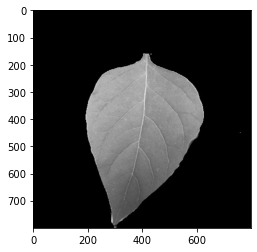

In [ ]:
img=immatrix[0].reshape(img_rows,img_cols)
plt.imshow(img)
plt.imshow(img,cmap='gray')
print (train_data[0].shape)
print (train_data[1].shape)

#%%
(X, y) = (train_data[0],train_data[1]) #(24, 10000)  Y=(24,)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, img_channels)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, img_channels)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

print("+++++++++++++++++++++")
print(nb_classes)
print(y_train)
print(y_test)

# convert class vectors to binary class matrices
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)
print("+++++++++++++++++++++")
print(Y_train)
print(Y_test)

label :  [1. 0. 0.]


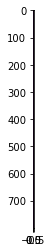

In [ ]:
#TEST DUNK NO 1
i = 1
plt.imshow(X_train[i, 0], interpolation='nearest')
print("label : ", Y_train[i,:])

label :  [0. 1. 0.]


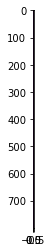

In [ ]:
i = 2
plt.imshow(X_train[i, 0], interpolation='nearest')
print("label : ", Y_train[i,:])

label :  [0. 1. 0.]


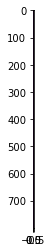

In [ ]:
i = 3
plt.imshow(X_train[i, 0], interpolation='nearest')
print("label : ", Y_train[i,:])


In [ ]:

nb_epoch = 100
batch_size = 32
nb_classes = 3


nb_filters = 32


# number of convolutional filters to use
nb_pool = 2 # size of pooling area for max pooling
nb_conv = 3 # convolution kernel size


model = Sequential()
model.add(Conv2D(nb_filters, kernel_size=(nb_conv, nb_conv), padding='valid', activation='relu', input_shape=(img_rows, img_cols, 1), data_format='channels_last'))
model.add(Conv2D(nb_filters, kernel_size=(nb_conv, nb_conv), activation='relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, kernel_size=(nb_conv, nb_conv), activation='relu'))
model.add(Conv2D(64, kernel_size=(nb_conv, nb_conv), activation='relu'))
model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.25))
model.add(Dense(nb_classes, activation = "softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])


In [ ]:
hist =model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,  verbose=1, validation_data=(X_test, Y_test))

Epoch 1/100


ResourceExhaustedError:  OOM when allocating tensor with shape[31,796,796,32] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[node sequential/conv2d_1/Relu (defined at <ipython-input-11-69705f0cc3e7>:1) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_994]

Function call stack:
train_function


In [ ]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

# print("++++++++++++++++")
# print(model.predict_classes(X_test[1:5])) #tes 4 data
# print(Y_test[1:5])
# print("------------------")

print(model.predict_classes(X_test)) #tes semua dataUji
print(Y_test)


In [ ]:
score = model.evaluate(X_train, Y_train, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])


In [ ]:
print(model.summary())
#%%
print(hist.history.keys())
# visualizing losses and accuracy

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
cek = val_acc
xc=range(nb_epoch)

print(train_acc)
print(val_acc)


In [ ]:
path_plt="C:\\xampp\\htdocs\\klasifikasicabai\\ypathfile\\"
path_loss = path_plt+"\\resource/loss.png"
path_acc = path_plt+"\\resource/acc.png"

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss vs Validation Loss')
plt.grid(True)
plt.legend(['Train','Validation'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['seaborn-white'])
plt.savefig(path_loss)

#print(plt.style.available)

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train Acc vs Validation Acc')
plt.grid(True)
plt.legend(['Train','Validation'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['seaborn-white'])
plt.savefig(path_acc)



In [ ]:
print(Y_test)


In [ ]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

from sklearn.metrics import classification_report,confusion_matrix
Y_pred = model.predict(X_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred) 
y_pred = model.predict_classes(X_test)
print(y_pred)

p=model.predict_proba(X_test) # to predict probability

In [ ]:
print(p)

In [ ]:
#target_names = ['1', '2', '3', '4', '5', '6', '7', '8']
#print(classification_report(np.argmax(Y_test,axis=1), y_pred,target_names=target_names))
print(confusion_matrix(np.argmax(Y_test,axis=1), y_pred))

# saving weights
print(Y_test)
print(y_pred)


In [ ]:
fname = path+"\\modelDaun100.h5"
model.save(fname)
#model.save_weights(fname,overwrite=True)